In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
#import dataset from Colab
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Disaster Tweet Dataset/train.csv"
!ls "/content/drive/My Drive/Disaster Tweet Dataset/train.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/My Drive/Disaster Tweet Dataset/train.csv'
'/content/drive/My Drive/Disaster Tweet Dataset/train.csv'


In [37]:
df=pd.read_csv('/content/drive/My Drive/Disaster Tweet Dataset/train.csv')

In [38]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
df.shape

(7613, 5)

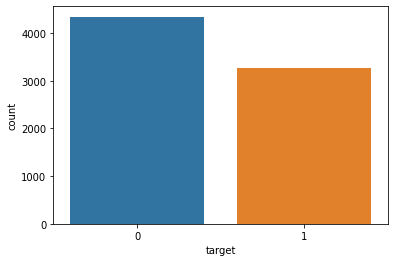

In [8]:
sns.countplot(data=df,x='target')

In [9]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
df['target'] = df.target.astype(str)
df.dtypes 

id           int64
keyword     object
location    object
text        object
target      object
dtype: object

In [11]:
data = df[['text','target']]
data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [12]:
y = df['target']
X = df['text']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

In [15]:
tfidf.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [16]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [17]:
X_train_tfidf

<6090x18242 sparse matrix of type '<class 'numpy.float64'>'
	with 59076 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=500)
log.fit(X_train_tfidf,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [21]:
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix

In [22]:
preds = nb.predict(X_test_tfidf)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       892
           1       0.80      0.65      0.72       631

    accuracy                           0.79      1523
   macro avg       0.79      0.77      0.78      1523
weighted avg       0.79      0.79      0.78      1523



In [23]:
confusion_matrix(y_test,preds)

array([[792, 100],
       [221, 410]])

In [24]:
preds = log.predict(X_test_tfidf)
print(classification_report(y_test,preds))
confusion_matrix(y_test,preds)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       892
           1       0.78      0.69      0.73       631

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



array([[771, 121],
       [198, 433]])

In [25]:
preds = svc.predict(X_test_tfidf)
print(classification_report(y_test,preds))
confusion_matrix(y_test,preds)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       892
           1       0.73      0.71      0.72       631

    accuracy                           0.77      1523
   macro avg       0.76      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



array([[725, 167],
       [184, 447]])

In [39]:
dftest = pd.read_csv("/content/drive/My Drive/Disaster Tweet Dataset/test.csv")
dftest.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [30]:
X = dftest['text']

In [31]:
X_test = tfidf.transform(X)

In [32]:
preds = nb.predict(X_test)

In [33]:
df_submission = pd.DataFrame({'id': dftest.id, 'target' : preds} )

In [34]:
df_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
